Importing the dependencies


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


Data Collection


In [4]:
# loading the dataset to a padas DataFrame
wine_dataset = pd.read_csv('/content/winequality-red.csv')

# number of rows and columns in the dataset
wine_dataset.shape

(1599, 12)

In [5]:
# first 5 rows of the dataset
wine_dataset.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

In [6]:
# checking for missing values in the dataset , data set must not have missing value so checking it , if something is missing calculate mean and put it in the missing value
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data analysis and visualisation

In [7]:
# statistical measures of the dataset
wine_dataset.describe()


fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

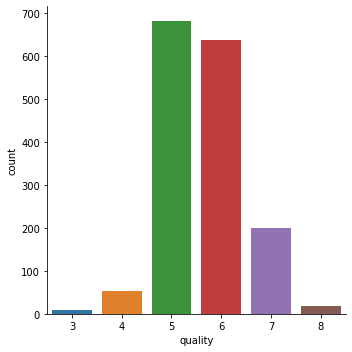

In [8]:
# number of values for each quality
sns.catplot(x = 'quality', data = wine_dataset, kind='count')

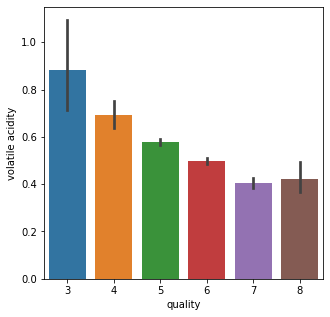

In [10]:
# volatile acidity vs quality ; checking if volatile acidity is related to quality
plot = plt.figure(figsize = (5,5))
sns.barplot( x= 'quality', y= 'volatile acidity', data = wine_dataset)

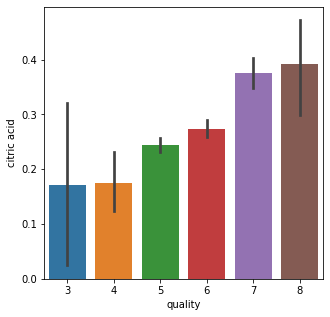

In [11]:
# citric acid vs quality ; checking if volatile acidity is related to quality
plot = plt.figure(figsize = (5,5))
sns.barplot( x= 'quality', y= 'citric acid', data = wine_dataset)

Correlation between all the columns and quality 
1. positive correlation (Directly proportional)
2. negative correlation (Inversely proportional)

In [16]:
correlation = wine_dataset.corr()




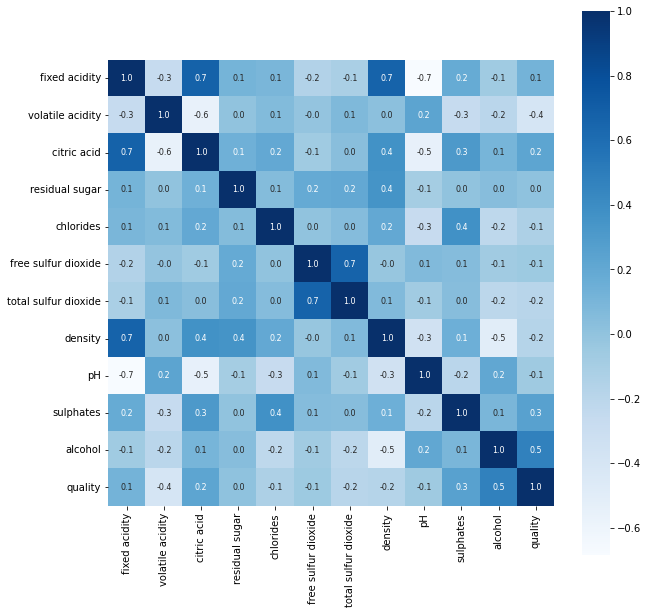

In [18]:
# constructing a heatmap to understand the coorelation between the columns
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap='Blues')

Data pre-processing

In [21]:
# seperate the data and Label
x = wine_dataset.drop('quality',axis=1) #dropping quality column
print(x)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

In [22]:
# Label binarization
# if quality <= 6 bad binary 0 , if >= 7 good binary 1
y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [23]:
# splitting data into training and testing data
# splitted into 4 variables (x,y) , 0.2 -> 20% original data to be test data, random_state->
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=0.2, random_state=3) 
print(y.shape, y_train.shape, y_test.shape)


(1599,) (1279,) (320,)


In [24]:
# model training; Random forest classifier model , MULTIPLE DECISION TREES, averages the results
model = RandomForestClassifier()

#fit data to the model to train
model.fit(x_train, y_train)

# x_train -> all training data citric acid, alcohol, etc ; y_train-> label value of all the training data , Quality value 0 , 1

# evaluate the model, performance metrics
# accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test) #comparing model with test dataset i.e y_test
 

In [26]:
print('ACCURACY % : ', test_data_accuracy * 100)

ACCURACY % :  93.4375


In [30]:
# building a predictive system,
# receive inputs from the user for 
# fixed acidity
# volatile acidity
# citric acid 
# residual sugar 
# chlorides 
# free sulfur dioxide 
# total sulfur dioxide 
# density 
# pH
# sulphates 
# alcohol

# tupple array
input_data = (7.7,0.705,0.1,2.6,0.084,9.0,26.0,0.9976,3.39,0.49,9.7)


# changing the input data to anumpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 1):
    print('Good quality')
else:
    print('Bad quality')


[0]
Bad quality


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
